## Bayesian signal processing

### variational bayes excercise(1)
    
$y=x + \epsilon $

$p(y|X,\beta )=N(y|x,\beta^{-1}) $ 



$p(x,\alpha) = N(x|0,\alpha^{-1}) $

$p(\alpha)=\frac{1}{Z}\alpha^{a-1}e^{-b\alpha}$

($\beta $ is fixed $\alpha$ and x are variables) 

we assume that $p(x,\alpha|y)=q(x|y)q(\alpha|y)$ ( VBEM algorithm)

We want to decide x and alpha.

in this problem, b is 0.25, a is 3.0,$\beta$ is 2.0

In [39]:
### generate y 
import numpy as np

alpha = [np.random.gamma(3.0,4.0) for i in range(0,1000)]
x = [np.random.normal(0,1.0/i*1.0) for i in alpha]
y = np.random.normal(x,1.0/2.0)

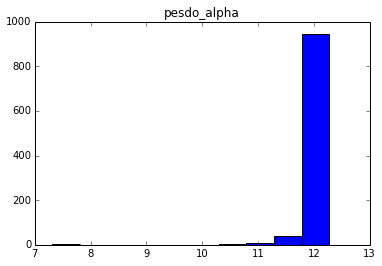

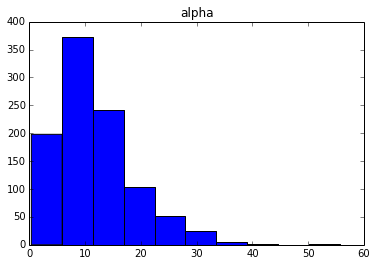

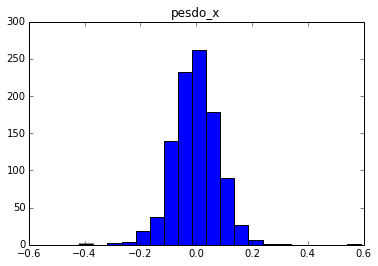

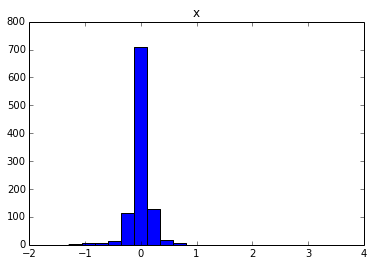

(array([   2.,   13.,   50.,  238.,  365.,  250.,   71.,    9.,    1.,    1.]),
 array([-2.33592625, -1.82697524, -1.31802423, -0.80907323, -0.30012222,
         0.20882879,  0.71777979,  1.2267308 ,  1.73568181,  2.24463282,
         2.75358382]),
 <a list of 10 Patch objects>)

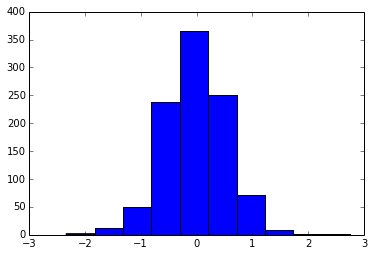

In [66]:
## we decise a and b by variational bayes

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## q(x|y)=N(x|pesdo_x,gamma^(-1))
## q(alpha|y)=N(pesdo_alpha)

## initialize 
beta = 2.0
pesdo_alpha = 3.0
a = 3.0
b = 0.25

for i in range(0,50):
    gamma = pesdo_alpha + beta
    pesdo_x = 1.0/((pesdo_alpha+beta)*1.0)*beta*y
    pesdo_alpha = (a+0.5)*np.power(b+0.5*(np.power(pesdo_x,2)+np.power(gamma,-1)),-1)

plt.title("pesdo_alpha")
plt.hist(pesdo_alpha)
plt.show()
plt.title("alpha")
plt.hist(alpha)
plt.show()
plt.title("pesdo_x")
plt.hist(pesdo_x,bins=20)
plt.show()
plt.title("x")
plt.hist(x,bins=20)
plt.show()
plt.hist(y)